# The Sparks Foundation : GRIP

## Prediction using Supervised Machine Learning

## Importing the required libraries

In [1]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Now let's read our required data

In [2]:

data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

Understanding the data

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


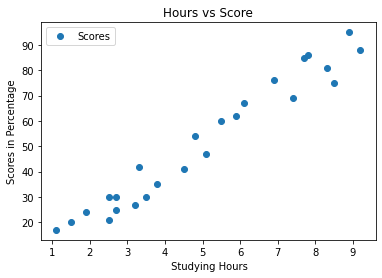

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel(' Studying Hours')  
plt.ylabel('Scores in Percentage')  
plt.show()

In [6]:
# Creating the correlation matrix
matrix = np.corrcoef(data["Hours"], data['Scores'])
print(matrix)

[[1.         0.97619066]
 [0.97619066 1.        ]]


Inference : The graph shows a positive linear relationship between studying hours and percentage score

### Preparing the data

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
#Dividing the data for training and testing
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the model

In [9]:
from sklearn.linear_model import LinearRegression  
l_r = LinearRegression()  
l_r.fit(X_train, y_train) 

LinearRegression()

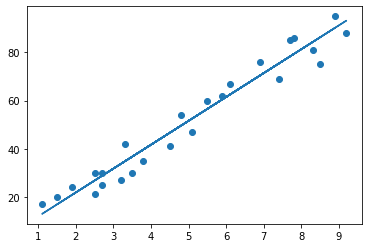

In [10]:
# Plotting the regression line
line = l_r.coef_*X+l_r.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Prediction

 Now let"s predict the the score of the test data using our model

In [11]:
y_pred = l_r.predict(X_test) # Predicting the scores

 Let's check how reliable our model is...

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


Let's check the predicted score if a student studies 9.25 hours a day

In [13]:
hours = [[9.25]]
own_pred = l_r.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539
